<a href="https://colab.research.google.com/github/fariduca/twitter-activity-analysis/blob/main/DS_MP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/tweepy/tweepy.git --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-vnl_lzqp
  Running command git clone -q https://github.com/tweepy/tweepy.git /tmp/pip-req-build-vnl_lzqp
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Created wheel for tweepy: filename=tweepy-4.12.1-py3-none-any.whl size=101664 sha256=26dd50a3a22ef809b160a6d14653bc96cbe16cc54378487c305cbf418557fd95
  Stored in directory: /tmp/pip-ephem-wheel-cache-fzh2zmdd/wheels/b4/a5/5a/5074abdb9f4bd5bd0e22631a63fc41ae2fa71ad83780ea18d1
Successfully built tweepy
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0


In [ ]:
import datetime
import matplotlib.pyplot as plt
import tweepy
import pandas as pd
import time 

In [ ]:
bearer_token = "AAAAAAAAAAAAAAAAAAAAADqIigEAAAAAm6AOqucZV01TS0Zw8xiqqYpcMAc%3DDNRh0FbTwnQrQR9FW9KvdW9udhc9UaUfyIHGxY0BAdHcQI2Sn0"

In [ ]:
client_v2 = tweepy.Client(bearer_token, wait_on_rate_limit=True)

In [ ]:
paginator = tweepy.Paginator(
    method=client_v2.get_all_tweets_count, 
    #query="(urge OR call OR calls OR deplore OR concerned OR condemn OR alarmed) from:UNHumanRights (context:131.847878884917886977 OR context:45.781974596157251587)", 
    query="(urge OR urges OR call OR calls OR deplore OR deplores OR concerned OR condemn OR alarmed) from:UNHumanRights -is:retweet", 
    start_time=datetime.datetime(2012,1,1), 
    end_time=datetime.datetime(2022,10,31),
    granularity="day"
    ).flatten(5000)

paginated_df = pd.DataFrame()
for cnt in paginator:
  #print(pd.json_normalize(cnt, sep="_"))
  paginated_df = paginated_df.append(pd.json_normalize(cnt, sep="_"), ignore_index=True)

paginated_df.to_csv("tweet_freq.csv")
paginated_df.head()


,end,start,tweet_count
0,2022-10-01T00:00:00.000Z,2022-09-30T00:00:00.000Z,1
1,2022-10-02T00:00:00.000Z,2022-10-01T00:00:00.000Z,0
2,2022-10-03T00:00:00.000Z,2022-10-02T00:00:00.000Z,0
3,2022-10-04T00:00:00.000Z,2022-10-03T00:00:00.000Z,0
4,2022-10-05T00:00:00.000Z,2022-10-04T00:00:00.000Z,0


In [ ]:
paginated_df = paginated_df.drop("end", axis=1)
paginated_df['start'] = pd.to_datetime(paginated_df['start'])
paginated_df['start'] = pd.to_datetime(paginated_df['start'].dt.date)

In [ ]:
#current_year = paginated_df[paginated_df.start > datetime.datetime(2021, 12, 31)]
groupped_df = paginated_df.groupby([paginated_df['start'].dt.year, paginated_df['start'].dt.month])['tweet_count'].sum()
groupped_df

start  start
2012   1         9
       2        21
       3        12
       4        18
       5        22
                ..
2022   6        16
       7        10
       8        13
       9        20
       10       17
Name: tweet_count, Length: 130, dtype: int64

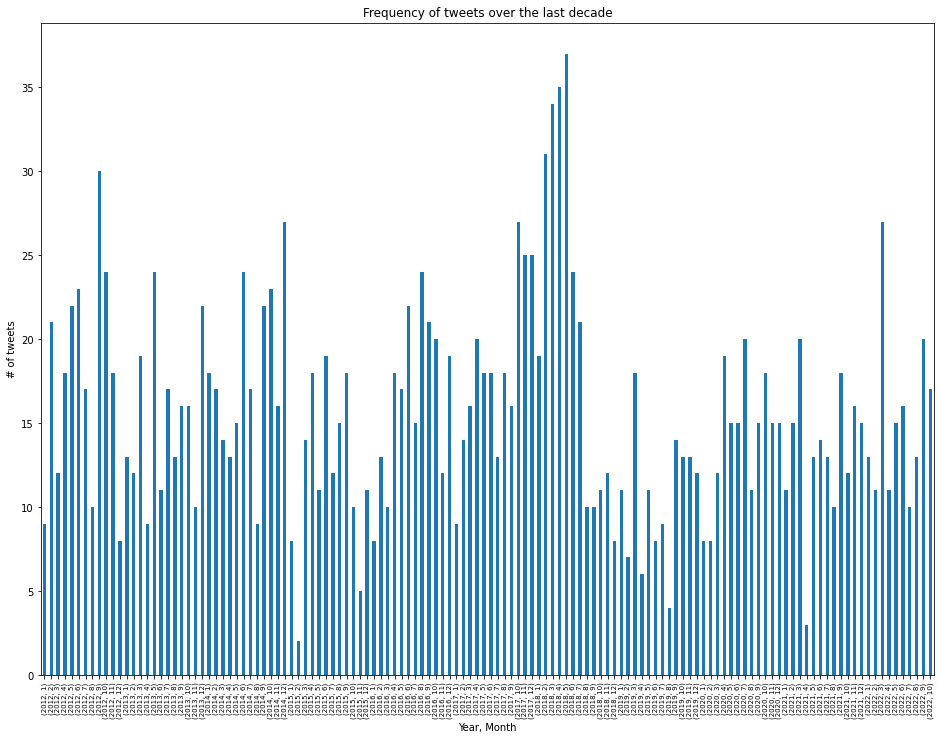

In [ ]:
plt.rc('ytick', labelsize=10)   
plt.rc('xtick', labelsize=7)

fig, ax = plt.subplots(figsize=(16, 12))
ax = groupped_df.plot.bar()
#ax.bar(groupped_df.index, groupped_df)
#ax.xaxis_date()
#plt.gcf().autofmt_xdate()
plt.title("Frequency of tweets over the last decade")
plt.xlabel("Year, Month")
plt.ylabel("# of tweets")
plt.show()

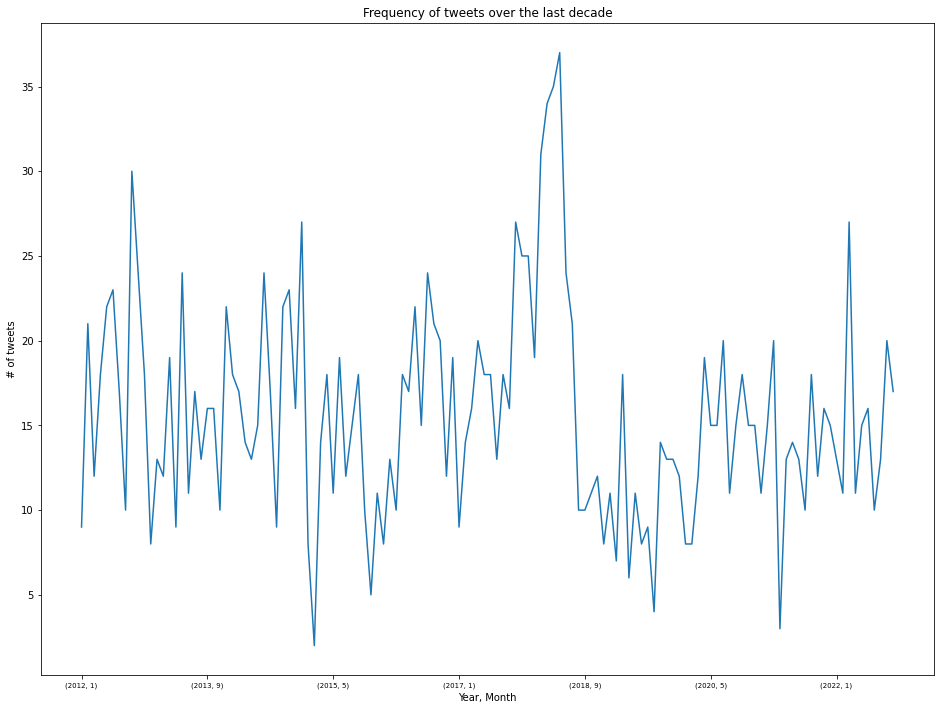

In [ ]:
import numpy as np
plt.subplots(figsize=(16, 12))
ax = groupped_df.plot.line()
ax.xaxis_date()
plt.title("Frequency of tweets over the last decade")
plt.xlabel("Year, Month")
plt.ylabel("# of tweets")

plt.show()

In [ ]:

tweets_paginator = tweepy.Paginator(
    method=client_v2.search_all_tweets,
    #query="(urge OR call OR calls OR deplore OR concerned OR condemn OR alarmed) from:UNHumanRights (context:131.847878884917886977 OR context:45.781974596157251587)", 
    query="(urge OR urges OR call OR calls OR deplore OR deplores OR concerned OR condemn OR alarmed) from:UNHumanRights -is:retweet", 
    start_time=datetime.datetime(2012,1,1), 
    end_time=datetime.datetime(2022,10,31), 
    tweet_fields=["created_at","public_metrics",],
    max_results=500,
    limit=1000
    )#.flatten(4000)

tweets_df = pd.DataFrame()

for n,page in enumerate(tweets_paginator):
  time.sleep(1)
  for item in page.data:
    #print(pd.json_normalize(item.data, sep="_"))
    tweets_df = tweets_df.append(pd.json_normalize(item.data, sep="_"), ignore_index=True)

tweets_df.to_csv("tweets.csv")
tweets_df

,edit_history_tweet_ids,text,created_at,id,public_metrics_retweet_count,public_metrics_reply_count,public_metrics_like_count,public_metrics_quote_count
0,[1585935858087206914],🇷🇺 #Russia: UN Human Rights Chief @volker_turk...,2022-10-28T10:05:48.000Z,1585935858087206914,104,87,267,12
1,[1585277631662006274],#SriLanka: 12yrs after disappearance of journa...,2022-10-26T14:30:15.000Z,1585277631662006274,33,62,75,1
2,[1585247006275952640],UN Human Rights Chief @volker_turk calls for m...,2022-10-26T12:28:33.000Z,1585247006275952640,95,49,159,4
3,[1585227260591841280],🇰🇬 #Kyrgyzstan: We call on the authorities to ...,2022-10-26T11:10:05.000Z,1585227260591841280,41,39,117,5
4,[1583435491436740608],"#Sudan: Ahead of coup anniversary, we call for...",2022-10-21T12:30:14.000Z,1583435491436740608,47,48,138,2
...,...,...,...,...,...,...,...,...
2027,[158957345337131008],#Myanmar: #UN expert welcomes releases & calls...,2012-01-16T17:02:39.000Z,158957345337131008,5,0,0,0
2028,[157453798397313024],#UN #humanrights chief urges concerted effort ...,2012-01-12T13:28:05.000Z,157453798397313024,4,0,2,0
2029,[156740026976313344],#Ban calls for #SouthAfrican political party t...,2012-01-10T14:11:49.000Z,156740026976313344,2,0,0,0
2030,[155227224130330624],"#PressBrief ""Cross amputation"" in #SaudiArabia...",2012-01-06T10:00:28.000Z,155227224130330624,3,0,1,0


In [ ]:
tweets_df['generated_activity'] = tweets_df['public_metrics_like_count'] + tweets_df['public_metrics_quote_count'] + tweets_df['public_metrics_reply_count']+ tweets_df['public_metrics_retweet_count']
tweets_df

,edit_history_tweet_ids,text,created_at,id,public_metrics_retweet_count,public_metrics_reply_count,public_metrics_like_count,public_metrics_quote_count,generated_activity
0,[1585935858087206914],🇷🇺 #Russia: UN Human Rights Chief @volker_turk...,2022-10-28T10:05:48.000Z,1585935858087206914,104,87,267,12,470
1,[1585277631662006274],#SriLanka: 12yrs after disappearance of journa...,2022-10-26T14:30:15.000Z,1585277631662006274,33,62,75,1,171
2,[1585247006275952640],UN Human Rights Chief @volker_turk calls for m...,2022-10-26T12:28:33.000Z,1585247006275952640,95,49,159,4,307
3,[1585227260591841280],🇰🇬 #Kyrgyzstan: We call on the authorities to ...,2022-10-26T11:10:05.000Z,1585227260591841280,41,39,117,5,202
4,[1583435491436740608],"#Sudan: Ahead of coup anniversary, we call for...",2022-10-21T12:30:14.000Z,1583435491436740608,47,48,138,2,235
...,...,...,...,...,...,...,...,...,...
2027,[158957345337131008],#Myanmar: #UN expert welcomes releases & calls...,2012-01-16T17:02:39.000Z,158957345337131008,5,0,0,0,5
2028,[157453798397313024],#UN #humanrights chief urges concerted effort ...,2012-01-12T13:28:05.000Z,157453798397313024,4,0,2,0,6
2029,[156740026976313344],#Ban calls for #SouthAfrican political party t...,2012-01-10T14:11:49.000Z,156740026976313344,2,0,0,0,2
2030,[155227224130330624],"#PressBrief ""Cross amputation"" in #SaudiArabia...",2012-01-06T10:00:28.000Z,155227224130330624,3,0,1,0,4


In [ ]:
!pip install geotext
!pip install pycountry
!pip install newspaper3k
!pip install spacy
!pip install nltk
!pip install locationtagger

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=f3baecde7f1b81c1efef9fe3cd6fe191c77ff5f77dab3551d44d20d83a1d30a5
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 211 kB 5.0 MB/s 
     |████████████████████████████████| 81 kB 9.2 MB/s 
     |████████████████████████████████| 93 kB 2.3

In [ ]:
import locationtagger
import nltk
from geotext import GeoText
import seaborn as sns
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2022-11-08 20:47:04.558447: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.0 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
## This cell where location tagging from the tweet text is performed takes some time (~6 mins)
country_mentions = []
for index, row in tweets_df.iterrows():
  cntry_list = locationtagger.find_locations(text=row["text"]).countries
  if len(cntry_list) > 0:
    country_mentions.append(cntry_list)
  else:
    country_mentions.append(GeoText(row["text"]).countries)


tweets_df['country_mentions'] = country_mentions

In [ ]:
countries = tweets_df['country_mentions']
countries = countries.apply(pd.Series).stack()

fd = nltk.FreqDist(countries)

In [ ]:
fd.most_common()

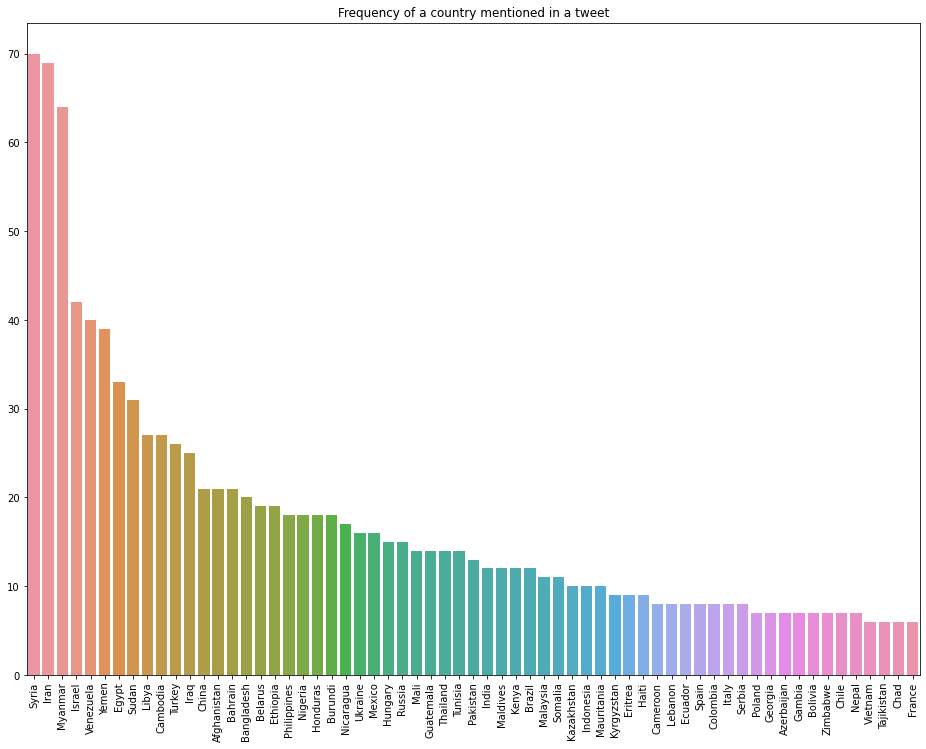

In [ ]:
fd_series = pd.Series(dict(fd))

fd_series = fd_series[fd_series > 5]
fd_series = fd_series.sort_values(ascending=False)

plt.rc('xtick', labelsize=10)
#plt.rc('axes', titlesize=12)       
fig, ax = plt.subplots(figsize=(16,12))

sns.barplot(x=fd_series.index, y=fd_series.values, ax=ax)
plt.xticks(rotation=90);

plt.title("Frequency of a country mentioned in a tweet")
plt.show()

#Notes for Future work

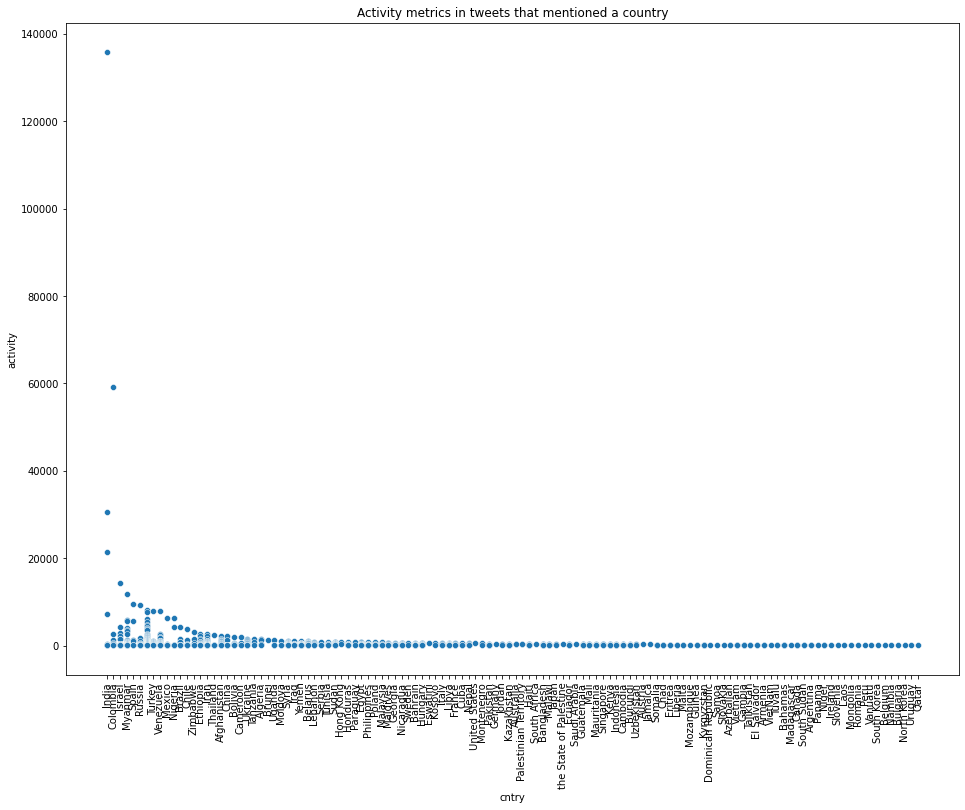

In [ ]:
x = tweets_df['country_mentions'].apply(lambda x: x[0] if (len(x) > 0) else '')
y = tweets_df['generated_activity']

dds = pd.DataFrame()
dds["cntry"] = x
dds["activity"] = y

dds = dds[dds.activity > 50]
dds = dds.sort_values(by='activity', ascending=False)
fig, ax = plt.subplots(figsize=(16,12))
sns.scatterplot(x=dds['cntry'], y=dds['activity'], ax=ax)
plt.xticks(rotation=90)

plt.title("Activity metrics in tweets that mentioned a country")
plt.show()

=============================================
